<center>
<img src="../Graphics/logo.png" width="400">    
</center> 

# 02 - Hückel Molecular Orbital Theory 

(🚧 **This tutorial is under construction!** 🚧)

This tutorial is part of the [Quantum Chemistry Foundations](https://github.com/fevangelista/Quantum-Chemistry-Foundations) series.

Francesco A. Evangelista

---

In this tutorial, you will explore the basics of molecular orbital theory and the concept of basis and use some linear algebra algorithms that are part of many quantum chemistry methods.

## What is Hückel theory?

Hückel molecular orbital theory describes $\pi$ electrons in planar conjugated organic molecules.
For sp<sup>2</sup> hybridized carbon atom, we consider only the out-of-plane 2p<sub>z</sub> orbital.
Here are some examples of molecules that can be studied with Hückel theory

<center>
<img src="examples.png" width="500" />
</center>

An important concept in quantum chemistry is **expressing an unknown quantity, like the molecular orbitals, using a linear combination of basis functions**.
In the case of Hückel theory, we express a molecular orbital ($\psi$) as a sum of atomic orbitals ($\chi_\mu$) times a coefficient $c_\mu$
\begin{equation}
|\psi \rangle = \sum_\mu^\mathrm{AO} |\chi_\mu\rangle c_{\mu} = |\chi_0\rangle c_{0} + |\chi_1\rangle c_{1} + \ldots
\end{equation}

<div class="alert alert-block alert-info"> 
<b>NOTE</b>: here, I am using Dirac's notation, so instead of specifying the coordinate dependence of the orbital explicitly as $\psi(x,y,z)$, I will just use the "ket" symbol $|\psi \rangle$.

In Dirac's notation, the overlap integral of quantum states $\psi(x,y,z)$ and $\phi(x,y,z)$ is written as
$$
\int dx dy dz \; \psi^*(x,y,z) \phi(x,y,z) = \langle \psi | \phi \rangle
$$
while the matrix element of an an operator $\hat{O}$ is written as
$$
\int dx dy dz \; \psi^*(x,y,z) \hat{O} \phi(x,y,z) = \langle \psi | \hat{O} | \phi \rangle
$$
</div>

## Visualizing the molecular orbitals

Let's try to get a feeling for how the vector of coefficients that enters into the definition of the molecular orbitals works. We will consider the 2p<sub>z</sub> orbitals of a planar molecule. The code below will show the molecular orbitals and will take as an input the $x_i$ and $y_i$ coordinates of the $i$-th atom and the value of the atomic orbital coefficient $c_i$.

It is not important for you to understand how this function works to follow the next steps. If you are interested the comments in the code should be sufficient. You could also try to use an AI chatbot to ask you to explain how it works.

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def plot_molecular_orbitals(coordinates, coefficients):
    """A function to plot molecular orbitals with given coordinates and coefficients.
       The probability of finding an electron is proportional to the area of the circles."""
    fig, ax = plt.subplots(figsize=(4, 4)) # Create a new figure with a specific size
    ax.set_aspect('equal', 'box') # Set equal aspect ratio 
    # Set plot limits with some padding based on the maximum and minimum of the x and y values
    x_vals, y_vals = zip(*coordinates) # Unzip the coordinates into x and y values
    ax.set_xlim(min(x_vals) - 1, max(x_vals) + 1)
    ax.set_ylim(min(y_vals) - 1, max(y_vals) + 1)      
    for (x, y), c in zip(coordinates, coefficients): # Loop over the coordinates and coefficients
        radius = np.abs(c) * 0.75 # Adjust scale factor for nicer visualization
        color = 'red' if c > 0 else 'blue' # Set color based on the sign of the coefficient
        # plot the molecular orbitals and atoms        
        mo = plt.Circle((x, y), radius, color=color, alpha=0.5) # Create a circle with the given radius and color
        ax.add_patch(mo) # Add the circle to the plot
        atom = plt.Circle((x, y), 0.05, color='black') # Create a circle for the atom
        ax.add_patch(atom) # Add the atom to the plot
    plt.show()

Let's consider the the carbon atoms in the ethylene molecule, at positions $(0,0)$ and $(1.33,0)$. We will now look at what the orbitals look when we change the orbital coefficients.

First, we set one coefficient to one and the other to zero, $(c_1, c_2) = (1.0, 0.0)$. We can see that the molecular orbital is fully localized on the first atom (on the left). Note that since we are plotting the 2p<sub>z</sub> orbital projected on the xy plane, it will look like a circle.

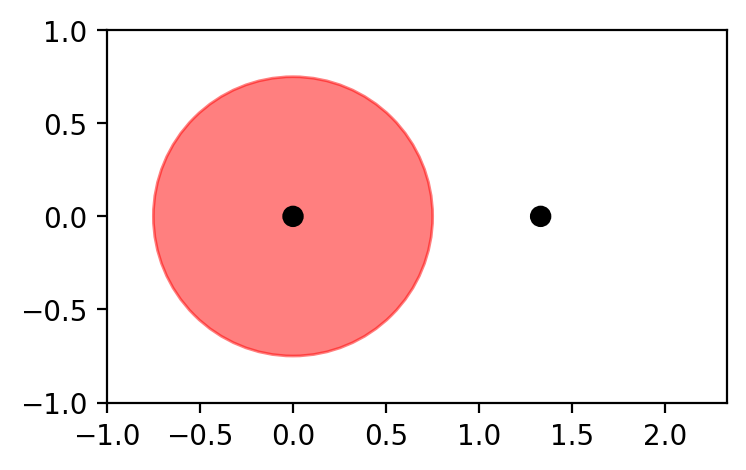

In [75]:
# define atom (x,y) coordinates
coordinates = [(0,0),(1.33,0)]
coefficients = [1.0,0.0]
plot_molecular_orbitals(coordinates, coefficients)

Now let's increase $c_2$ from zero to 0.2 and decrease $c_1$ so that the coefficient vector remains (approximately) normalized to one ($|c_1|^2 + |c_2|^2 = 1$). In this case, the electron is mostly located on the left atom with some density on the right atom

c = (0.9797958971132712, 0.2)


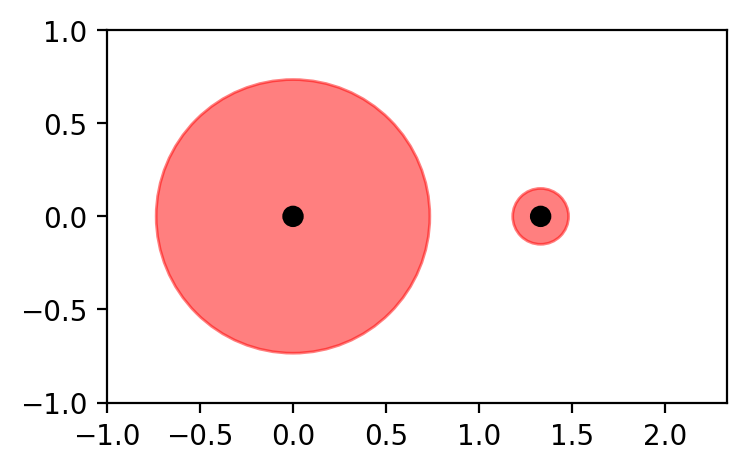

In [76]:
c2 = 0.2
c1 = np.sqrt(1 - c2**2) # normalize the coefficients
print(f'c = {(c1,c2)}')
coefficients = [c1,c2]
plot_molecular_orbitals(coordinates, coefficients)

Now let's consider the case of two equal coefficients, $(c_1,c_2) = (\frac{1}{\sqrt{2}},\frac{1}{\sqrt{2}})$. This corresponds to a bonding orbital.

c = (0.7071067811865476, 0.7071067811865475)


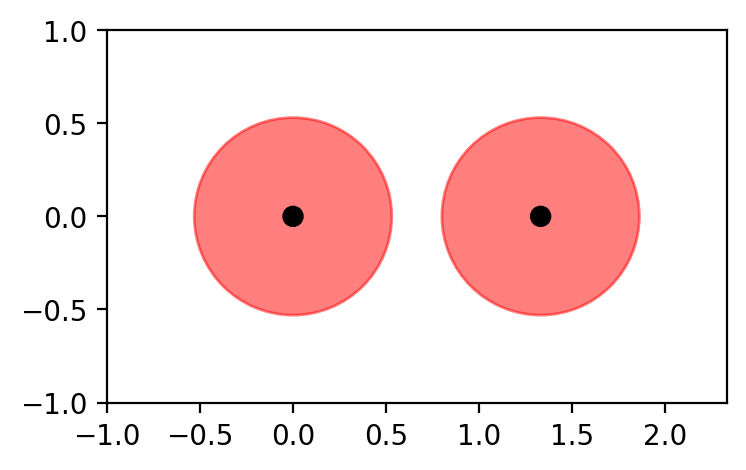

In [79]:
c2 = 1.0/np.sqrt(2)
c1 = np.sqrt(1 - c2**2) # normalize the coefficients
print(f'c = {(c1,c2)}')
coefficients = [c1,c2]
plot_molecular_orbitals(coordinates, coefficients)

### **Exercise**: Play with the molecular orbital visualizer 📝

To become familiar with the idea of representing the molecular orbitals using atomic orbitals and the meaning of the coefficient vector, modify the code below to do the following:

1. Plot the antibonding orbital of ethylene.
2. Plot the molecular orbital of a chain of 3 carbon atoms, with equal and positive coefficients.


In [83]:
# coordinates = ...
# coefficients = ...
# plot_molecular_orbitals(coordinates, coefficients)

## The MO coefficients matrix ($\mathbf{C}$) 👈

When representing molecular orbitals in a basis of atomic orbitals, it is convenient to store all the coefficients together as a matrix.
To understand how this is done, we will consider an example that you should be already familiar with: the molecular orbitals of the H<sub>2</sub> molecule.
The figure below shows how the bonding and antibonding molecular orbitals of H<sub>2</sub> are the plus and minus combination of the 1s atomic orbitals of H on each atom
<center>    
<img src='h2_mos.png' width=600>
</center>

Now, let's rewrite these two orbitals in a slightly different way using linear algebra concepts.
We will consider the atomic orbitals as elements of a **row vector** and the coefficients that multiply these AOs as a **column vector**
<center>    
<img src='h2_mos_step_1.png' width=500>
</center>
This is just an equivalent way to rewrite the MOs of H<sub>2</sub>.
<div class="alert alert-block alert-warning"> 
This is an important concept and you should make sure this makes sense to you before moving on.
Remember that when we multiply a row vector times a column vector, we are taking the dot product of them, for example:
\begin{equation}
\begin{pmatrix}
a_1 & a_2
\end{pmatrix}
\begin{pmatrix}
b_1 \\
b_2
\end{pmatrix} = a_1 b_1 + a_2 b_2
\end{equation}
</div>

Next, we go one step further and recognize that we can write both equations using a single equation, where the column vectors are replaced by a **matrix** of column vectors
<center>    
<img src='h2_mos_step_2.png' width=675>
</center>

In the general case, we write the $i$-th molecular orbital in the following way
$$
|\psi_i \rangle = \sum_\mu^\mathrm{AO} |\chi_\mu\rangle C_{\mu i} = |\chi_0\rangle C_{0 i} + |\chi_1\rangle C_{1 i} + \ldots
$$
where we introduced the coefficient matrix $C_{\mu i}$.
Note that coefficients for a each orbital are stored as **columns** (the convention is that the first index of a matrix labels the row and the second one the column).

## More on Hückel theory 🔎

Hückel theory is perhaps best understood as a **model** of π electrons in molecules.
In this model, we postulate that the molecular orbitals satisfy a Schrödinger-like equation
$$
\hat{h} |\psi_i \rangle = \varepsilon_i |\psi_i \rangle
$$
where $\hat{h}$ is the Hamiltonian operator.

Contrary to first-principle methods that start from the exact form of the Schrödinger equation, in Hückel theory we do not assume to know its exact form.
Instead, we **parameterize** the matrix elements of the Hamiltonian in the basis of atomic orbitals, which is also called the **matrix representation** of $\hat{h}$ in the atomic basis.
In the simplest form of Hückel theory, the matrix elements are defined by the following condition
$$
\langle \chi_\mu | \hat{h} | \chi_\nu \rangle = \int d\mathbf{r} \; \chi_\mu^*(\mathbf{r})  \hat{h}  \chi_\nu(\mathbf{r}) = 
\begin{cases}
\alpha & \mu = \nu \\
\beta & \text{if $\chi_\mu$ and $\chi_\nu$ are on adjacent atoms} \\
0  & \text{otherwise}
\end{cases}
$$

We also assume that the atomic orbitals are **normalized and orthogonal** (orthonormal), that is the inner product is given by
$$
\langle \chi_\mu | \chi_\nu \rangle = \delta_{\mu \nu} = \begin{cases}
1 & \mu = \nu \\
0 & \text{otherwise}
\end{cases}
$$

Once we have the matrix representation of the Hamiltonian, we can find the orbital energies and coefficient matrix by solving the eigenvalue problem
$$
\mathbf{H C} = \mathbf{C} \boldsymbol \varepsilon
$$
where $\boldsymbol \varepsilon$ is a diagonal matrix with entries equal to the orbital energies
$$
\boldsymbol \varepsilon = 
\begin{pmatrix}
\varepsilon_1 & 0 & 0 & \cdots \\
0 & \varepsilon_2 & 0 & \cdots \\
0 & 0 & \varepsilon_3 &  \\
\vdots & \vdots & &  \ddots
\end{pmatrix}
$$

### Example: the methylenecyclopropene cation 🧪

As an example, let's consider the methylenecyclopropene cation (C<sub>4</sub>H<sub>4</sub><sup>+</sup>) and construct the matrix representation of the Hamiltonian.
The structure of this molecule and the numbering of the carbon atoms we are going to adopt is shown below (the molecule is on the z plane so you see the 2p<sub>z</sub> orbitals from the top)
<center>
<img src="mcpc.png" width=150>
</center>

If we label the 2p<sub>z</sub> orbitals of each atom with the number used in the figure above (that is, $\chi_1$ is centered on C number 1, and so on) then the Hamiltonian matrix is given by
$$
\mathbf{H} = 
\begin{pmatrix}
\langle \chi_1 | \hat{h} | \chi_1 \rangle & \langle \chi_1 | \hat{h} | \chi_2 \rangle & \langle \chi_1 | \hat{h} | \chi_3 \rangle & 
\langle \chi_1 | \hat{h} | \chi_4 \rangle \\
\langle \chi_2 | \hat{h} | \chi_1 \rangle & \langle \chi_2 | \hat{h} | \chi_2 \rangle & \langle \chi_2 | \hat{h} | \chi_3 \rangle & 
\langle \chi_2 | \hat{h} | \chi_4 \rangle \\
\langle \chi_3 | \hat{h} | \chi_1 \rangle & \langle \chi_3 | \hat{h} | \chi_2 \rangle & \langle \chi_3 | \hat{h} | \chi_3 \rangle & 
\langle \chi_3 | \hat{h} | \chi_4 \rangle \\
\langle \chi_4 | \hat{h} | \chi_1 \rangle & \langle \chi_4 | \hat{h} | \chi_2 \rangle & \langle \chi_4 | \hat{h} | \chi_3 \rangle & 
\langle \chi_4 | \hat{h} | \chi_4 \rangle
\end{pmatrix}
=
\begin{pmatrix}
\alpha & \beta & \beta & 0 \\
\beta & \alpha & \beta & 0 \\
\beta & \beta & \alpha & \beta \\
0 & 0 & \beta & \alpha
\end{pmatrix}
$$

## Algorithm design and coding principles ⚠️

The Python code that will solve the equations of Hückel theory will perform the following tasks
1. Read a molecular structure in the form of an xyz file and store this information.
1. Generate the Hückel Hamiltonian matrix $\mathbf{H}$.
1. Solve the eigenvalue problem to compute the orbital energies and coefficient matrix.


Before we start coding, we need to state some coding principles we will follow in this tutorial. These are
1. **Code incrementally**. Instead of writing long pieces of code and then test it out, we will try to break it down into small pieces. 
1. **Test often**. We will try to test our code as early and as often as possible.
1. **Avoid early optimization**. We will first write code in the most simple way, not worrying about optimization.

These principles help us manage the complexity of codes and avoid lengthy debugging.

Let's begin by importing `numpy` and other python libraries that we will need later.

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

# display output of plotting commands inline 
%matplotlib inline 

# generate high-resolution matplotlib figures
%config InlineBackend.figure_format='retina'

### Step 1. Reading the coordinates from a file

Our first task is to read the geometry of a hydrocarbon and store the position of the C atoms.

We assume the input to a Hückel computation is an xyz file containing the coordinates and types of atoms in a molecule.
An xyz file has the following structure
- The first line contains the number of atoms in the molecule
- The second line contains an optional comment and can be blank
- The third and following lines contain a list of all the atoms and their Cartesian coordinates (in units of Ångstrom)

The following command will display the xyz coordinates stored in the file `ethylene.xyz` contained in the same directory of this notebook

In [3]:
!cat ethylene.xyz

6

C        0.5897992921      0.8910088584     -0.0000000000                 
C        1.9255867815      0.8910088584      0.0000000000                 
H        2.4854727859      1.8209660408      0.0000000000                 
H        2.4854727859     -0.0389483240     -0.0000000000                 
H        0.0299132877      1.8209660408     -0.0000000000                 
H        0.0299132877     -0.0389483240      0.0000000000                 

We will start by writing a function that reads a generic xyz file. This function will take the file name and return a list of tuples that contain the element symbol and xyz coordinates stored as a `numpy` array for all the atoms in the molecule. Here we store only the position of the carbon atoms, but in the future we could be interested in extending this code to read the position of other elements.

Let's start to write a minimal version of this function that takes in the filename, creates an empty list, and returns the list of atoms. At the end of this function we test it by passing a valid file name and print the output. We expect this to return an empty list and that's what we get

In [4]:
def read_geometry(filename):
    atoms = []
    
    return atoms

atoms = read_geometry("ethylene.xyz")
atoms

[]

Now let's add some code to read the file and print its content

In [5]:
def read_geometry(filename):
    atoms = []
    with open(filename, "r") as f:
        lines = f.readlines() # read all lines into a list
        for line in lines[2:]: # skip the first two lines
            print(line)
    return atoms

atoms = read_geometry("ethylene.xyz")
atoms    

C        0.5897992921      0.8910088584     -0.0000000000                 

C        1.9255867815      0.8910088584      0.0000000000                 

H        2.4854727859      1.8209660408      0.0000000000                 

H        2.4854727859     -0.0389483240     -0.0000000000                 

H        0.0299132877      1.8209660408     -0.0000000000                 

H        0.0299132877     -0.0389483240      0.0000000000                 


[]

All looks great, so let's continue by adding code to split the text contained in a line, and if there are four parts to the split line we then extract and store the symbol and xyz coordinates in a tuple that we add to the list of atoms. We also add a line to document the function, so that in the future we might know what it does

In [10]:
def read_geometry(filename):
    """This function reads the geometry of a molecule from an XYZ file
    and stores the atom symbol and coordinates of the carbon atoms in a list of tuples.
    """
    atoms = []
    with open(filename, "r") as f:
        lines = f.readlines() # read all lines into a list
        for line in lines[2:]: # skip the first two lines
            parts = line.split()
            if len(parts) >= 4:
                symbol = parts[0]
                xyz = np.array([float(x) for x in parts[1:4]])
                atoms.append((symbol, xyz)) if symbol == "C" else None
    return atoms

atoms = read_geometry("ethylene.xyz")
atoms    

[('C', array([ 0.58979929,  0.89100886, -0.        ])),
 ('C', array([1.92558678, 0.89100886, 0.        ]))]

We are now done with part one. This functions could be improved in many ways. For example, it could check if the file exists or make sure that the xyz is valid. These features can be added at a later stage, when our Hückel code is complete and works.

### Step 2. Building the Huckel Hamiltonian

In [10]:
def build_huckel_hamiltonian(coords, r_cutoff=1.5, alpha=0.0, beta=-1.0):
    N = len(coords)
    H = np.zeros((N, N))
    for i, (_, xyz1) in enumerate(coords):
        for j, (_, xyz2) in enumerate(coords):
            distance = np.linalg.norm(xyz1 - xyz2)
            if distance < r_cutoff:
                if i == j:
                    H[i, i] == alpha
                else:
                    H[i, j] = beta
    return H

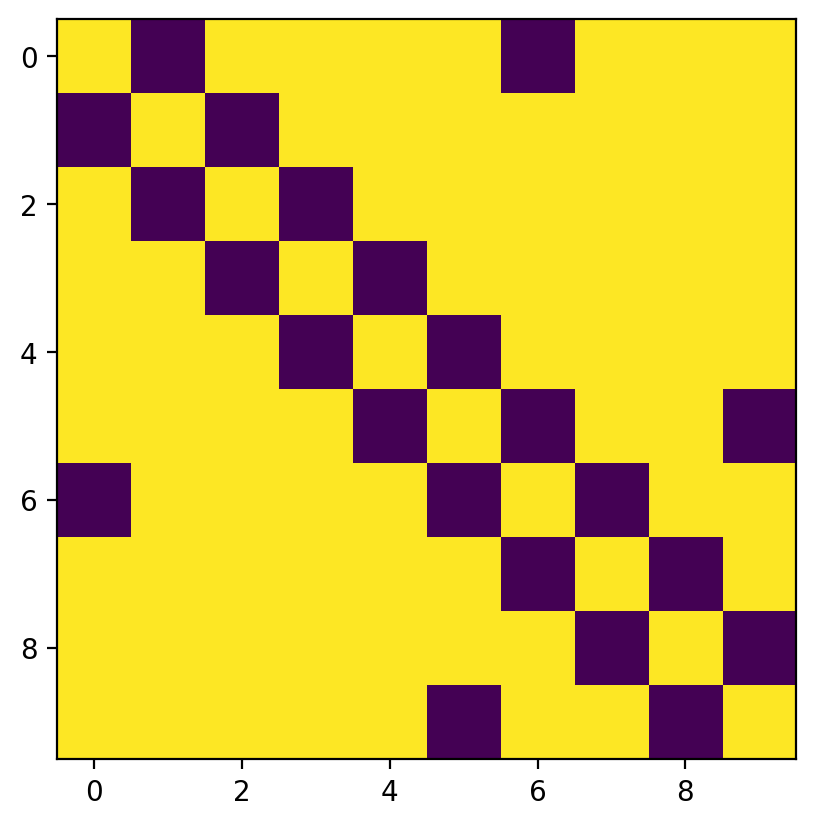

In [11]:
coords = read_geometry("azulene.xyz")
H = build_huckel_hamiltonian(coords, r_cutoff=1.54)
plt.imshow(H)

### Diagonalize the Hamiltonian

In [12]:
energies, c = np.linalg.eigh(H)
print(f"{energies = }")
print(f"c = \n{str(c)}")

energies = array([-2.31027685, -1.65157231, -1.35567429, -0.88697524, -0.47726   ,
        0.40039232,  0.73764031,  1.5792181 ,  1.86921398,  2.09529399])
c = 
[[-2.88639908e-01 -1.90899630e-01 -4.84057274e-01 -2.18557775e-01
   1.60119398e-01 -4.69935985e-01 -3.57060155e-01 -8.43570010e-02
   3.23296923e-01 -3.35497212e-01]
 [-1.99808914e-01 -4.33267002e-01 -3.57060155e-01  1.59778573e-01
   3.35497212e-01 -1.02277651e-01  4.84057274e-01  2.69710597e-01
  -4.04502640e-01  1.60119398e-01]
 [-1.72974001e-01 -5.24672155e-01  5.13478149e-16  3.60277414e-01
   4.44089210e-16  5.10887171e-01  1.11022302e-16 -3.41574856e-01
   4.32805067e-01 -4.99600361e-16]
 [-1.99808914e-01 -4.33267002e-01  3.57060155e-01  1.59778573e-01
  -3.35497212e-01 -1.02277651e-01 -4.84057274e-01  2.69710597e-01
  -4.04502640e-01 -1.60119398e-01]
 [-2.88639908e-01 -1.90899630e-01  4.84057274e-01 -2.18557775e-01
  -1.60119398e-01 -4.69935985e-01  3.57060155e-01 -8.43570010e-02
   3.23296923e-01  3.35497212e-01]
 [-4